# Prediction using Supervised ML

# How to impliment Linear Regression model on a dataset

# What will be predicted score if a student studies for 9.25 hrs/ day?

# Import libraries 

In [186]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm

# Import Data

In [187]:
df = pd.read_csv('E:\Linear.csv')

# EDA part

In [188]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# No Null values 

In [190]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [191]:
df.shape

(25, 2)

In [192]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


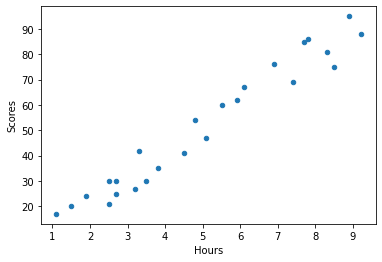

In [193]:
df.plot(kind = 'scatter', x='Hours', y ='Scores')

plt.show()

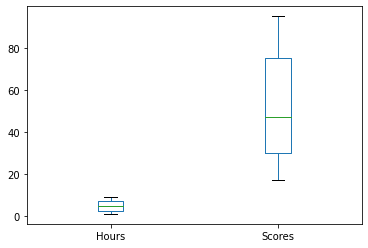

In [194]:
df.plot(kind ='box')
plt.show()

# Correlation Coefficients

In [195]:
df.corr() 

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Fitting Simple Linear Regresion on dataset

In [196]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [202]:
# Fitting the best model on the dataset
lm = LinearRegression()
lm.fit(Scores,Hours)

LinearRegression()

In [203]:
lm.coef_

array([[0.09748029]])

In [204]:
lm.intercept_

array([-0.00628558])

In [205]:
lm.score(Hours,Scores) # Evaluate the model

-4.217904408860862

In [165]:
Hours = df.Hours.values.reshape(-1,1)
Scores = df.Scores.values.reshape(-1,1)

# Visualize the result

Text(0.5, 1.0, 'Ploting The Regression Line')

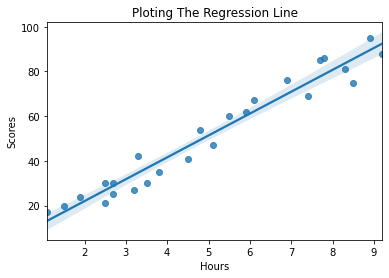

In [206]:
sns.regplot(x='Hours',y='Scores',data=df)
plt.title('Ploting The Regression Line')

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [207]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")


Training complete.


In [208]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Comparing Actual vs Predicted

In [215]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [212]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [216]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.18385989900298
